# 103590450 四資四 馬茂源

1. It is known that the HIV test has only 0.1% of false positive and false negative, respectively. However, for a specific group of people, the prevalence of HIV positive rate is 0.01 %. If a person belongs to such a group and is found to be positive in the HIV test, find the probability that the person is really infected.

|   | true | false |
--- | :-: | :-:
| test positive ( 0.01%) | `0.01% * 99.9%` | `99.99% * 0.1%`  |
| test negative (99.99%) | `0.01% *  0.1%` | `99.99% * 99.9%` |
| | `0.01%` | `99.99%` |

P(really infected | prevalence) = precision = ![precision](https://latex.codecogs.com/svg.latex?%5CLARGE%20%5Cfrac%7BTP%7D%7BTP&plus;FP%7D)

= `0.01% * 99.9%` / (`0.01% * 99.9%` + `99.99% * 0.1%`) = 0.09083469721767594 = **9.08%**

2 . UC Irvine has a large repository for various kinds of data. In this problem, you are asked to use the iris dataset (https://archive.ics.uci.edu/ml/datasets/Iris) to perform the experiments. Implement the k-NN classifier for the classification task. To begin one experiment, randomly draw 70 % of the instances for training and the rest for testing. Repeat the drawing and the k-NN classification 10 times and compute the average accuracy. Then, plot the curve of k versus accuracy for k = 1, 3, …, 15. For simplicity, use the Euclidean distance in your computation.

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

In [20]:
data = load_iris()
#print(data.DESCR)

In [21]:
def print_test_result(k, acc):
    fig = plt.figure(figsize=(10, 5), dpi=100, facecolor='white')
    plt.plot(k, acc)
    plt.xticks(np.arange(1, 15+1, 2))
    plt.yticks(np.arange(0.93, 0.98+0.005, 0.005))
    plt.title('accuracy for each k')
    plt.ylabel('accuracy')
    plt.xlabel('#k')
    plt.legend(['test set'], loc='upper left')
    plt.show()

In [22]:
class MyKNeighborsClassifier:
    def __init__(self, n_neighbors=3, **kwargs):
        self._k = n_neighbors
        self._X = self._y = None
        self.set_params(**kwargs)
            
    def get_params(self, deep=True):
        # suppose this estimator has parameters "alpha" and "recursive"
        return {'_k':self._k, 
                '_X': self._X, 
                '_y':self._y}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    def fit(self, X, y):
        self._X = X
        self._y = y
    
    def _predict(self, x):
        distances = np.apply_along_axis(lambda x1: np.linalg.norm(x-x1), 1, self._X)
        X_candidates = np.argsort(distances)[:self._k]
        y_candidates = self._y[X_candidates]
        return np.argmax(np.bincount(y_candidates))
    
    def score(self, X, y_true):
        return accuracy_score(y_true, self.predict(X))
    
    def predict(self, X):
        return np.apply_along_axis(lambda x: self._predict(x), 1, X)

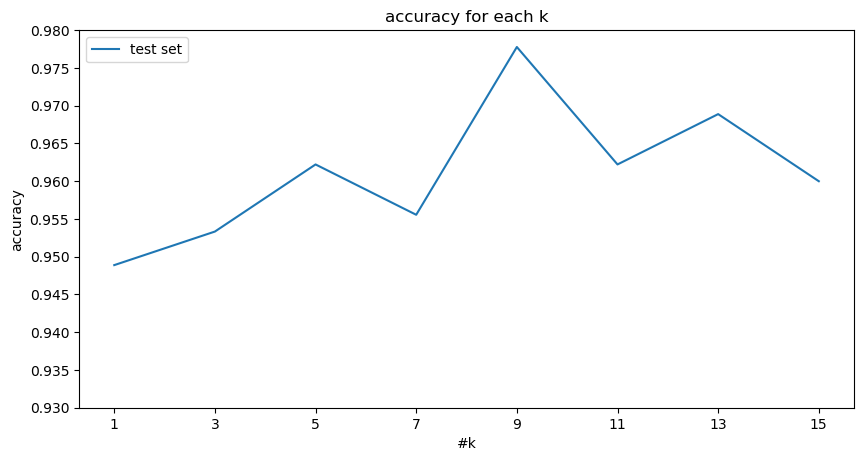

In [23]:
K = list(range(1, 15+1, 2))
test_acc_randomly = []
for k in K:
    # Repeat the drawing and the k-NN classification 10 times.
    acc = []
    
    for i in range(10):
        #model = KNeighborsClassifier(n_neighbors=k)
        model = MyKNeighborsClassifier(n_neighbors=k)
        X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)
        model.fit(X_train, y_train)
        acc.append(accuracy_score(y_test, model.predict(X_test)))

    test_acc_randomly.append(np.mean(acc))
    
    
print_test_result(K, test_acc_randomly)

3 . Following problem 2, if you do not have the test dataset (i.e., you have only the 70 % of dataset), how do you determine the optimal value of k? Use your own approach to find such a value and compare the results you have in problem 2 . Comment on your results.

## I use K-fold cross-validation

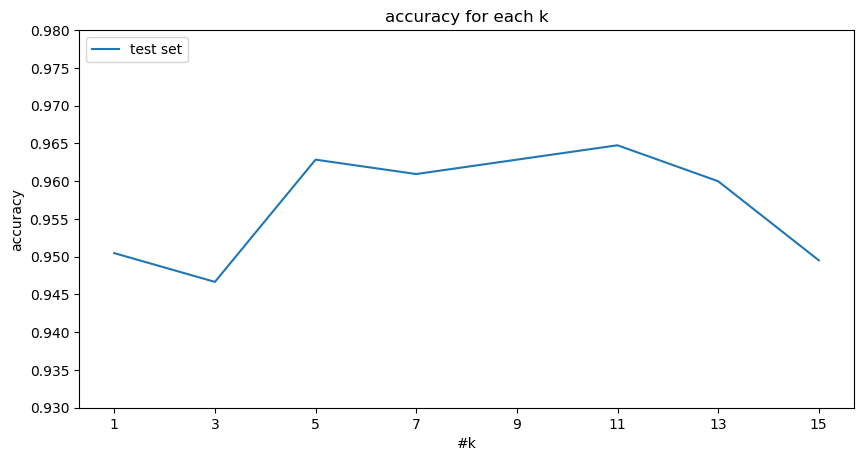

In [24]:
K = list(range(1, 15+1, 2))
cross_validation_acc = []
for k in K:
    # Repeat the drawing and the k-NN classification 10 times.
    acc = []
    for i in range(10):
        #model = KNeighborsClassifier(n_neighbors=k)
        model = MyKNeighborsClassifier(n_neighbors=k)
        
        # Assuming that I don't have test data
        X_train, _, y_train, _ = train_test_split(data.data, data.target, test_size=0.3)
        acc.append(np.mean(cross_val_score(model, X_train, y_train, cv=5)))
        
    cross_validation_acc.append(np.mean(acc))
    
    
print_test_result(K, cross_validation_acc)

4 . In the class, we covered the naive Bayes classifier, but only with discrete-type features. Consult any paper to learn how to extend this approach to continuous-type features. Explain your finding as an algorithm.


5 . Repeat problem 2 with your algorithm in problem 4. Compare the accuracy of naive Bayes classifier with the k-NN.